SEVERITYCODE = A code that corresponds to the severity of the
collision:
• 3—fatality
• 2b—serious injury
• 2—injury
• 1—prop damage
• 0—unknown


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

C:\Users\berkg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
df.shape

(194673, 38)

In [6]:
new_df = df[['SEVERITYCODE', 'WEATHER','ROADCOND','LIGHTCOND']]
new_df.head()


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [7]:
new_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

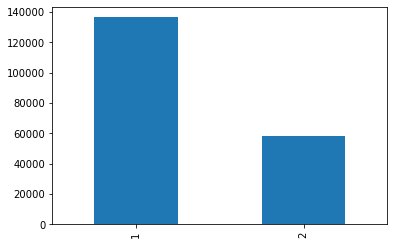

In [8]:
new_df['SEVERITYCODE'].value_counts().plot(kind='bar')

In [60]:
corr = new_df.corr()
corr

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,1.000000,-0.005591,-0.016074,-0.020005
WEATHER,-0.005591,1.000000,-0.369915,0.101519
ROADCOND,-0.016074,-0.369915,1.000000,-0.095282
LIGHTCOND,-0.020005,0.101519,-0.095282,1.000000


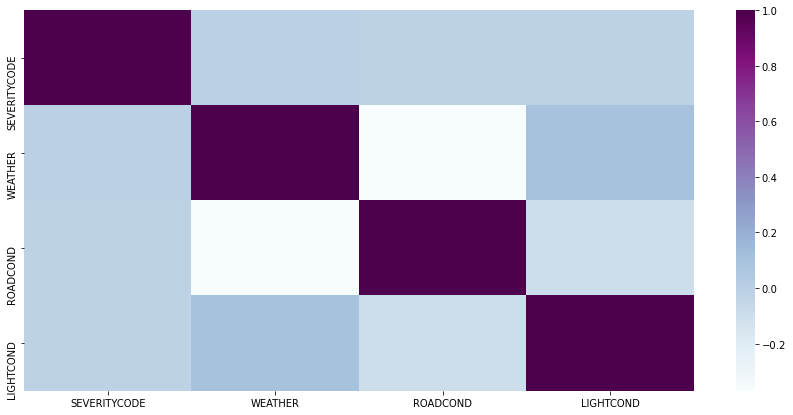

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(corr, linecolor = 'blue', cmap="BuPu" )

In [11]:
print('Number of NaN values for the column WEATHER:', new_df['WEATHER'].isnull().sum())
print('Number of NaN values for the column ROADCOND:', new_df['ROADCOND'].isnull().sum())
print('Number of NaN values for the column LIGHTCOND:', new_df['LIGHTCOND'].isnull().sum())

Number of NaN values for the column WEATHER: 5081
Number of NaN values for the column ROADCOND: 5012
Number of NaN values for the column LIGHTCOND: 5170


In [12]:
new_df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

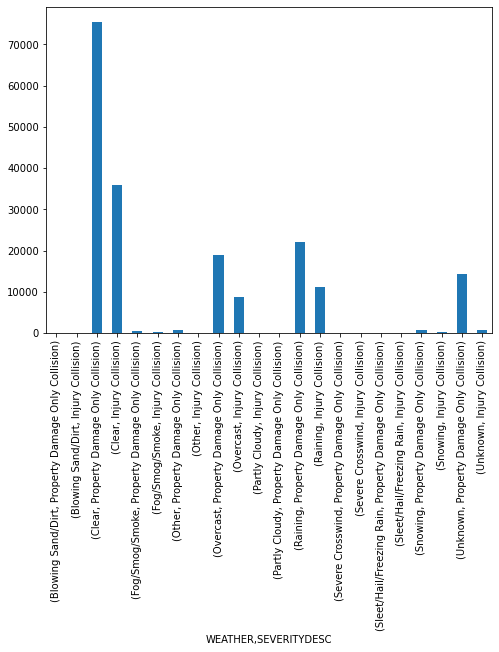

In [13]:
df_weather = df.groupby(['WEATHER'])['SEVERITYDESC'].value_counts().plot(kind='bar', figsize=(8,6))

In [14]:
new_df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

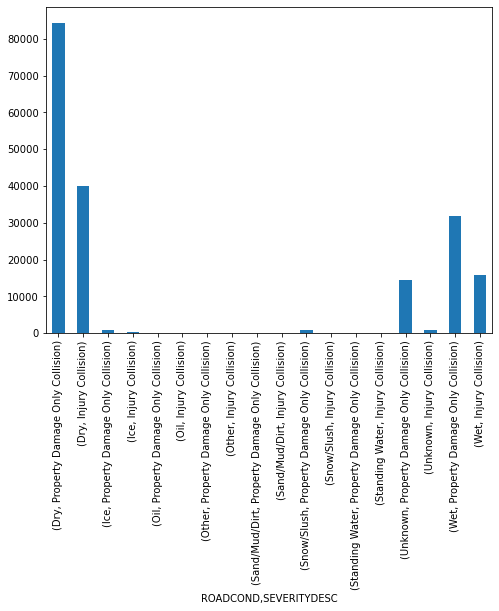

In [15]:
df_road = df.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().plot(kind='bar', figsize=(8,6))

In [16]:
new_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

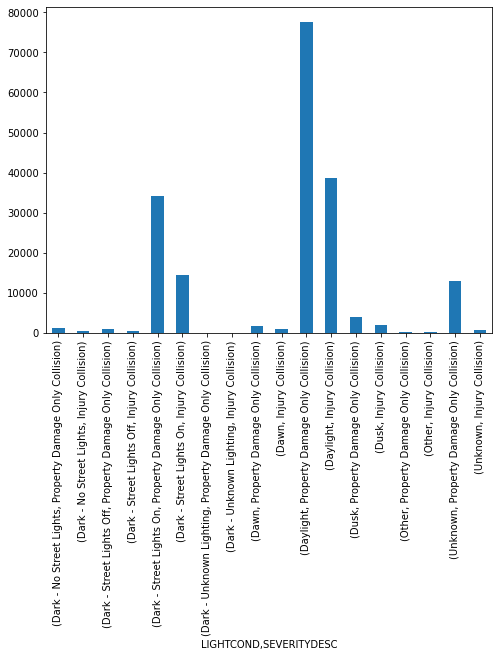

In [17]:
df_light = df.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().plot(kind='bar', figsize=(8,6))

In [18]:
new_df.replace('Unknown', np.nan, inplace = True)
new_df.replace('Other', np.nan, inplace = True )


C:\Users\berkg\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:
new_df.dropna(subset = ['WEATHER', 'LIGHTCOND', 'ROADCOND'], axis = 0, inplace = True)

<ipython-input-19-3eb22a03524e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(subset = ['WEATHER', 'LIGHTCOND', 'ROADCOND'], axis = 0, inplace = True)


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169957 entries, 0 to 194672
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  169957 non-null  int64 
 1   WEATHER       169957 non-null  object
 2   ROADCOND      169957 non-null  object
 3   LIGHTCOND     169957 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.5+ MB


In [21]:
print('Number of NaN values for the column WEATHER:', new_df['WEATHER'].isnull().sum())
print('Number of NaN values for the column ROADCOND:', new_df['ROADCOND'].isnull().sum())
print('Number of NaN values for the column LIGHTCOND:', new_df['LIGHTCOND'].isnull().sum())

Number of NaN values for the column WEATHER: 0
Number of NaN values for the column ROADCOND: 0
Number of NaN values for the column LIGHTCOND: 0


In [22]:
new_df['SEVERITYCODE'].value_counts()

1    114274
2     55683
Name: SEVERITYCODE, dtype: int64

In [23]:
print(new_df['LIGHTCOND'].value_counts())
print('****************************')
print(new_df['ROADCOND'].value_counts())
print('****************************')
print(new_df['WEATHER'].value_counts())

Daylight                    112618
Dark - Street Lights On      46748
Dusk                          5648
Dawn                          2413
Dark - No Street Lights       1408
Dark - Street Lights Off      1114
Dark - Unknown Lighting          8
Name: LIGHTCOND, dtype: int64
****************************
Dry               121490
Wet                46324
Ice                 1080
Snow/Slush           833
Standing Water       105
Sand/Mud/Dirt         65
Oil                   60
Name: ROADCOND, dtype: int64
****************************
Clear                       108825
Raining                      32648
Overcast                     26923
Snowing                        825
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       107
Blowing Sand/Dirt               46
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


In [24]:
new_df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Dark - Unknown Lighting'], dtype=object)

In [25]:
new_df['ROADCOND'].unique()

array(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'], dtype=object)

In [26]:
new_df['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', 'Snowing', 'Fog/Smog/Smoke',
       'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [27]:
X = new_df[['WEATHER','ROADCOND','LIGHTCOND']].values
X[:5]

array([['Overcast', 'Wet', 'Daylight'],
       ['Raining', 'Wet', 'Dark - Street Lights On'],
       ['Overcast', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Daylight'],
       ['Raining', 'Wet', 'Daylight']], dtype=object)

In [28]:
new_df['WEATHER'].replace(to_replace=['Overcast', 'Raining', 'Clear', 'Snowing', 'Fog/Smog/Smoke',
                                      'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
                                      'Severe Crosswind', 'Partly Cloudy'], value = [3,2,1,4,5,6,7,8,9], inplace = True)
new_df['ROADCOND'].replace(to_replace=['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Sand/Mud/Dirt',
                                       'Standing Water', 'Oil'], value = [1,2,3,4,5,6,7], inplace = True)
new_df['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
                                        'Dusk', 'Dawn', 'Dark - Street Lights Off',
                                        'Dark - Unknown Lighting'], value = [1,2,3,4,5,6,7], inplace = True)

C:\Users\berkg\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [29]:
new_df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,3,1,1
1,1,2,1,2
2,1,3,2,1
3,1,1,2,1
4,2,2,1,1


Random under sampling: 2    55683
1    55683
Name: SEVERITYCODE, dtype: int64


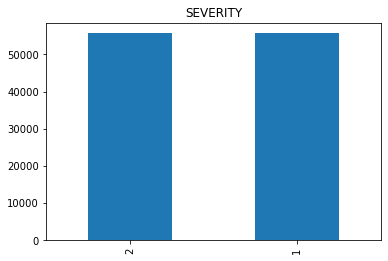

In [30]:
count_severity_1, count_severity_2 = new_df.SEVERITYCODE.value_counts()

df_severity_1 = new_df[new_df['SEVERITYCODE'] == 1]
df_severity_2 = new_df[new_df['SEVERITYCODE'] == 2]

df_severity_1_under = df_severity_1.sample(count_severity_2)
df_test_under = pd.concat([df_severity_1_under, df_severity_2], axis=0)

print('Random under sampling:', df_test_under.SEVERITYCODE.value_counts())

df_test_under.SEVERITYCODE.value_counts().plot(kind='bar', title = 'SEVERITY')

In [31]:
df_test_under['SEVERITYCODE'].value_counts()

2    55683
1    55683
Name: SEVERITYCODE, dtype: int64

In [32]:
df_test_under.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
114655,1,1,2,1
13157,1,2,1,1
168851,1,1,2,1
126021,1,1,2,1
10452,1,1,2,2


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix


In [34]:
y = df_test_under['SEVERITYCODE'].values
X = df_test_under.drop(['SEVERITYCODE'], axis=1)

In [35]:
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [36]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.66664469,  0.4948579 , -0.5431085 ],
       [ 0.56956073, -1.46385496, -0.5431085 ],
       [-0.66664469,  0.4948579 , -0.5431085 ],
       [-0.66664469,  0.4948579 , -0.5431085 ],
       [-0.66664469,  0.4948579 ,  0.60120475]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4) 
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (77956, 3) (77956,)
Test Set:  (33410, 3) (33410,)


# K Nearest Neighbor(KNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 15
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neighb = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neighb.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)

print(mean_acc)
print('Best Accuracy: ', mean_acc.max())
print('Best Value of k: ', mean_acc.argmax()+1)

[0.50416043 0.51092487 0.51637234 0.50903921 0.50999701 0.50832086
 0.50835079 0.5096079  0.51146363 0.5114337  0.51248129 0.50924873
 0.51185274 0.50760251]
Best Accuracy:  0.5163723436096977
Best Value of k:  3


In [52]:
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat_knn = neigh.predict(X_test)
neigh

KNeighborsClassifier(n_neighbors=3)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_knn))
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

              precision    recall  f1-score   support

           1       0.53      0.31      0.39     16658
           2       0.51      0.73      0.60     16752

    accuracy                           0.52     33410
   macro avg       0.52      0.52      0.49     33410
weighted avg       0.52      0.52      0.49     33410

KNN's Accuracy:  0.5163723436096977


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

severityTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
severityTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [42]:
yhat_dt = severityTree.predict(X_test)
print(classification_report(y_test, yhat_dt))
print('Decision Tree Acc. : ', metrics.accuracy_score(y_test,yhat_dt))

              precision    recall  f1-score   support

           1       0.53      0.34      0.41     16658
           2       0.51      0.70      0.59     16752

    accuracy                           0.52     33410
   macro avg       0.52      0.52      0.50     33410
weighted avg       0.52      0.52      0.50     33410

Decision Tree Acc. :  0.5186171804848848


# SVM (Support Vector Machine)

In [43]:
from sklearn import svm

clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)


SVC()

In [44]:
yhat_svm = clf.predict(X_test)
print(yhat_svm[0:5])
print(y_test[0:5])

[2 1 1 2 2]
[2 1 1 2 2]


In [45]:
print(classification_report(y_test, yhat_svm))
print("SVM's Accuracy: ", metrics.accuracy_score(y_test,yhat_svm))

              precision    recall  f1-score   support

           1       0.53      0.27      0.36     16658
           2       0.51      0.77      0.62     16752

    accuracy                           0.52     33410
   macro avg       0.52      0.52      0.49     33410
weighted avg       0.52      0.52      0.49     33410

SVM's Accuracy:  0.5183178689015265


# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [47]:
yhat_LR = LR.predict(X_test)
yhat_LR[0:5]

array([2, 1, 2, 2, 2], dtype=int64)

In [48]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.48188434, 0.51811566],
       [0.50769935, 0.49230065],
       [0.49106437, 0.50893563],
       [0.49591597, 0.50408403],
       [0.49591597, 0.50408403]])

In [49]:
print(classification_report(y_test, yhat_LR))
print('LogLoss:', log_loss(y_test, yhat_prob))
print("Logistic Regression's Accuracy:", metrics.accuracy_score(y_test,yhat_LR))

              precision    recall  f1-score   support

           1       0.52      0.34      0.41     16658
           2       0.51      0.70      0.59     16752

    accuracy                           0.52     33410
   macro avg       0.52      0.52      0.50     33410
weighted avg       0.52      0.52      0.50     33410

LogLoss: 0.6927051671267729
Logistic Regression's Accuracy: 0.5173900029931159


__Performances of different models__

In [50]:
acc_knn = metrics.accuracy_score(y_test, yhat_knn)
acc_dt = metrics.accuracy_score(y_test,yhat_dt)
acc_svm = metrics.accuracy_score(y_test,yhat_svm)
acc_log = metrics.accuracy_score(y_test,yhat_LR) 
data = {" ":['Accuracy Score'],"KNN": [acc_knn],
       "Decision Tree": [acc_dt],
       "SVM": [acc_svm],
       "Logistic Regression": [acc_log]}

per_df = pd.DataFrame(data, columns= [" ","KNN","Decision Tree","SVM","Logistic Regression"])

In [51]:
per_df.set_index(" ")

,KNN,Decision Tree,SVM,Logistic Regression
,,,,
Accuracy Score,0.511853,0.518617,0.518318,0.51739
